# Installation

In [ ]:
# pip install -r requirements.txt

In [ ]:
# pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

# Datasets

## 1.PersonaChat

In [10]:
import requests
import os

# Define the URLs for the dataset
kaggle_url = "https://www.kaggle.com/datasets/atharvjairath/personachat"
huggingface_url = "https://s3.amazonaws.com/datasets.huggingface.co/personachat/personachat_self_original.json"

# Specify the directory where you want to save the dataset
save_dir = "./datasets/PersonaChat"

# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Download the dataset from Kaggle
kaggle_filename = os.path.join(save_dir, "personachat_kaggle.json")
response_kaggle = requests.get(kaggle_url)
with open(kaggle_filename, "wb") as f:
    f.write(response_kaggle.content)
print(f"Downloaded Kaggle dataset to {kaggle_filename}")

# Download the dataset from Hugging Face
huggingface_filename = os.path.join(save_dir, "personachat_huggingface.json")
response_huggingface = requests.get(huggingface_url)
with open(huggingface_filename, "wb") as f:
    f.write(response_huggingface.content)
print(f"Downloaded Hugging Face dataset to {huggingface_filename}")


Downloaded Kaggle dataset to ./datasets/PersonaChat/personachat_kaggle.json
Downloaded Hugging Face dataset to ./datasets/PersonaChat/personachat_huggingface.json


In [ ]:
import json

# dataset_path = './datasets/PersonaChat/personachat_huggingface.json'

dataset_path = './datasets/PersonaChat/personachat_kaggle.json'

with open(dataset_path, 'r') as f: data = json.load(f)

data.keys()

In [ ]:
data['test'][0]

In [7]:
print('Train structure:\n', data['train'][0].keys())
print('\nPersonality structure:\n', data['train'][0]['personality'])
print('\nUtterance structure:\n', data['train'][0]['utterances'][0].keys())


Train structure:
 dict_keys(['personality', 'utterances'])

Personality structure:
 ['i like to remodel homes .', 'i like to go hunting .', 'i like to shoot a bow .', 'my favorite holiday is halloween .']

Utterance structure:
 dict_keys(['candidates', 'history'])


In [ ]:
data['train'][0]['utterances'][0]['history']

In [ ]:
data['train'][0]['utterances'][0]['candidates']

## 2.Synthetic-Persona-Chat

In [8]:
Dataset = "Synthetic-PersonaChat"

We introduce the Synthetic-Persona-Chat dataset, a persona-based conversational dataset, consisting of two parts. 

https://huggingface.co/datasets/google/Synthetic-Persona-Chat

In [9]:
import pandas as pd

# ds_train = pd.read_csv("./datasets/Synthetic-PersonaChat/Synthetic-Persona-Chat_train.csv")
# ds_valid = pd.read_csv("./datasets/Synthetic-PersonaChat/Synthetic-Persona-Chat_valid.csv")
ds_test = pd.read_csv("./datasets/Synthetic-PersonaChat/Synthetic-Persona-Chat_test.csv")

# ds = pd.concat([ds_train, ds_valid, ds_test])

ds = ds_test
ds.isnull().sum()

user 1 personas                0
user 2 personas                0
Best Generated Conversation    1
dtype: int64

In [10]:
ds

,user 1 personas,user 2 personas,Best Generated Conversation
0,I just bought a brand new house.\r\nI like to ...,I love to meet new people.\r\nI have a turtle ...,"User 1: Hi, I'm [User 1's name]. What's your n..."
1,I am an old man.\r\nI have a wheelchair that i...,I drive a ford pickup truck.\r\nI am very cons...,User 1: Hi there!\r\nUser 2: Hello.\r\nUser 1:...
2,I met my best friend in kindergarten.\r\nI am ...,I have two dogs and one cat.\r\nI work as a nu...,User 1: Hi! What do you do for work?\r\nUser 2...
3,I love having facial hair.\r\nI hope to retire...,I am happy being single and alone.\r\nI only d...,User 1: How are you doing today?\r\nUser 2: I'...
4,I love watching movies and tv.\r\nI have a hus...,I am afraid of heights.\r\nI love animals and ...,User 1: Hi there!\r\nUser 2: Hi there!\r\nUser...
...,...,...,...
963,I work out every day.\r\nMy favorite musician ...,I got a job working in advertising last year.\...,"User 1: Hi, my name is [user 1's name].\r\nUse..."
964,I lift weights every weekend.\r\nI am big and ...,I am currently attending school.\r\nI like mus...,"User 1: Hey, I'm [user 1].\r\n\r\nUser 2: Hi, ..."
965,I am considering going to college.\r\nIts a de...,I do not eat anything sweet.\r\nI do not drive...,"User 1: Hi, my name is [user 1's name].\r\nUse..."
966,I have an exotic fish aquarium.\r\nI collect v...,I only drink water.\r\nI do not want children....,User 1: Hey there!\r\nUser 2: Hello!\r\nUser 1...


In [11]:
# Replace '**' in all columns
ds = ds.replace(r'\*\*', '', regex=True)
# Remove all '\r' from all columns
ds = ds.replace(r'\r', '', regex=True)

ds = ds.replace("'", "", regex=True)

ds.dropna(inplace=True)

print(ds.isnull().sum())

user 1 personas                0
user 2 personas                0
Best Generated Conversation    0
dtype: int64


In [12]:
import pandas as pd


# Function to split the conversation
def split_conversation(conv_str):

    utterances = conv_str.split("\n")
    if len(utterances) > 1:
        context = "\n".join(utterances[:-2])
        query = utterances[-2]
        response = utterances[-1]
    else:
        context = ""
        query = utterances[-1] if len(utterances) == 1 else ""
        response = ""
    return context, query, response

new_rows = []

# Iterate through the original DataFrame and process each row
for index, row in ds.iterrows():
    context, query, response = split_conversation(row['Best Generated Conversation'])
    
    # Create a new row dictionary
    new_row = {
        'personas': '[User 1 persona] :' + row['user 1 personas'] + " <SEP> [User 2 persona] :" + row['user 2 personas'],
        'context': context,
        'query': query,
        'act_response': response
    }
    
    # Append the new row dictionary to the list
    new_rows.append(new_row)

# Convert the list of new rows to a DataFrame
new_df = pd.DataFrame(new_rows)


print(new_df.isnull().sum())

new_df.head(2)

personas        0
context         0
query           0
act_response    0
dtype: int64


,personas,context,query,act_response
0,[User 1 persona] :I just bought a brand new ho...,"User 1: Hi, Im [User 1s name]. Whats your name...",User 2: Sounds good. Bye.,User 1: Bye.
1,[User 1 persona] :I am an old man.\nI have a w...,User 1: Hi there!\nUser 2: Hello.\nUser 1: Im ...,User 2: Golf is a great way to make new friends.,User 1: Ill have to give it a try.


In [13]:
# Calculate maximum number of words in each column
max_persona_length = new_df['personas'].apply(lambda x: len(x.split())).max()
max_context_length = new_df['context'].apply(lambda x: len(x.split())).max()
max_response_length = new_df['act_response'].apply(lambda x: len(x.split())).max()

print(f"Maximum Persona Length (in words): {max_persona_length}")
print(f"Maximum Context Length (in words): {max_context_length}")
print(f"Maximum Response Length (in words): {max_response_length}")

Maximum Persona Length (in words): 99
Maximum Context Length (in words): 601
Maximum Response Length (in words): 26


In [ ]:
# Save the new DataFrame to a CSV file
new_df.to_csv('./datasets/Synthetic-PersonaChat/ds_cleaned.csv', index=False)
# new_df.to_excel('./datasets/Synthetic-PersonaChat/ds_cleaned.xlsx', index=False)

Todo
- remove the "User1:" or "User2:" form the "act_response"


## 3.Blended Skill Talk

In [1]:
Dataset = "Blended Skill Talk"

https://www.kaggle.com/datasets/thedevastator/multi-modal-conversation-data?resource=download

In [2]:
import pandas as pd

ds_test = pd.read_csv(f'./datasets/{Dataset}/test.csv')


ds = ds_test
ds.isnull().sum()

personas                       0
additional_context           652
previous_utterance             0
context                        0
free_messages                  0
guided_messages                0
suggestions                    0
guided_chosen_suggestions      0
label_candidates               0
dtype: int64

In [3]:
ds

,personas,additional_context,previous_utterance,context,free_messages,guided_messages,suggestions,guided_chosen_suggestions,label_candidates
0,['i hate talking to people.' 'i believe dragon...,Social anxiety,"['Wow, I am never shy. Do you have anxiety?'\n...",wizard_of_wikipedia,['and why is that?'\n 'interesting but I know ...,"[""I think it's because in my head, I think eve...","{'convai2': array([""i've no idea i am also ver...",['wizard_of_wikipedia' '' ''],[array(['Oh nice! My brother in law is a lawye...
1,['i have three daughters.' 'my wife and i like...,NaN,['My turtle ran away from me today.'\n 'Oh my ...,empathetic_dialogues,"[""that's funny. No. I let him roam around the ...",['What does your turtle eat? Is it hard to ta...,{'convai2': array(['no . i wanted to punch him...,['' '' '' '' '' ''],"[array([""I really can't imagine... does she do..."
2,['i hate the taste of fish.' 'i like to paint.'],NaN,['Our son in the Army is taking a leave to vis...,empathetic_dialogues,"[""Can't believe he grew up so quick""\n 'What d...","['Yeah, kids grow up so quickly '\n 'We will p...","{'convai2': array([""i'm sure you and your husb...",['empathetic_dialogues' '' '' '' '' ''],"[array([""It was an accident, actually. I'm a b..."
3,['my favorite movie is good burger.' 'i like c...,NaN,"[""that's awesome , i like running in the morni...",convai2,['Canning is great for storing food. Sometimes...,"[""Wow, you've done a marathon? I run a bit, b...","{'convai2': array(['yeah , that is a great foo...",['' '' '' '' '' ''],"[array(['well, what if Eminem plays video game..."
4,['my hair is black.' 'i like rock climbing.'],Rock climbing,['Are there different skill levels? '\n 'I do ...,wizard_of_wikipedia,['How would I start rock climbing?'\n 'I will ...,['I would suggest a fitness place with a rock ...,{'convai2': array(['ha . well maybe you could ...,['' '' '' '' '' ''],"[array([""Haha yeah. I'm not sure why people d..."
...,...,...,...,...,...,...,...,...,...
975,['i love adventures like mountain climbing.'\n...,Cartography,"['Really, that is very interesting.Tell me mor...",wizard_of_wikipedia,['I have. I believe Ive learn those in college...,['Its a concept that can venture many ways. Ho...,"{'convai2': array([""i've not maybe i should !""...",['' '' '' '' '' ''],[array(['Me either. What is your favorite genr...
976,['i enjoy summer walking and reading.' 'i live...,NaN,['I just found out I was accepted into medical...,empathetic_dialogues,['Since I got accepted I really want to quit m...,"['Indeed, if i could have it my way I would en...",{'convai2': array(['it is good to be a doctor ...,['' '' 'empathetic_dialogues' '' '' 'empatheti...,[array(['Are you in a relationship? Are you i...
977,['my hair is short and pink.' 'i love to trave...,Blue,['What are the other primary colors?'\n 'I bel...,wizard_of_wikipedia,"[""Blue is my favorite color. It's calming. ""\n...",['I believe it is. I painted my daughters room...,{'convai2': array(['rain is calming to the sou...,['' 'empathetic_dialogues' '' 'convai2' '' 'co...,"[array([""That's so sad! I'm sorry it happened...."
978,['my dog s name is toto.' 'my favorite food is...,NaN,"[""I can't face my wife, I had a child out of m...",empathetic_dialogues,"[""various reasons, mentally i wasnt in a good ...","[""Wow with a kid involved that's a big no no! ...",{'convai2': array(['oh that is terrible ! i am...,['empathetic_dialogues' 'empathetic_dialogues'...,"[array(['Well, the library is a good place to ..."


In [4]:
import re

ds.drop(['additional_context', 'context', 'guided_chosen_suggestions', 'label_candidates', 'suggestions'], axis=1, inplace=True)

ds.rename(columns={'previous_utterance':'context',
                   'free_messages':'query',
                     'guided_messages':'act_response'}
                     ,inplace= True)


In [5]:
# Define a function to format the text
def format_persona(text):
    persona = ''.join(text)
    return f"[User 1 persona]: {persona}"

def remove_quotes(input_list):
    cleaned_list = [re.sub(r'^[\'"]|[\'"]$', '', item.strip()) for item in input_list]
    return cleaned_list

def create_AnnotatedConversation(cleaned_lst):
    formatted_string = ""
    for index, item in enumerate(cleaned_lst):
        if index % 2 == 0:
            user = "User1"
        else:
            user = "User2"
        formatted_string += f"{user}: {item}\n"
    formatted_string = formatted_string.rstrip("\n")
    return formatted_string

def format_context(text):
    #Remove the enclosing square brackets and single quotes
    text = re.sub(r'[\[\]]', '', text)
    #Split conversation with \n
    lines = text.split('\n')
    cleaned_lst = remove_quotes(lines)
    return cleaned_lst

def get_response(text): 
    cleaned_lst = format_context(text)
    #just return first response
    return cleaned_lst[0] 

def create_utterance(context,query):
    new_conversation = context + [query]
    annotatedConversation = create_AnnotatedConversation(new_conversation)
    return annotatedConversation

ds['personas'] = ds['personas'].apply(lambda x: format_persona(x))
ds['context'] = ds['context'].apply(lambda x:format_context(x))
ds['query'] = ds['query'].apply(lambda x: get_response(x))
ds['act_response'] = ds['act_response'].apply(lambda x: get_response(x))
ds['formatted_utterance'] = ds.apply(lambda row: create_utterance(row['context'], row['query']), axis=1)


print(ds.isnull().sum())

personas               0
context                0
query                  0
act_response           0
formatted_utterance    0
dtype: int64


In [6]:
ds.drop(['context', 'query'], axis=1, inplace=True)
ds.rename(columns={'formatted_utterance':'context',}
                     ,inplace= True)

ds.head(1)

,personas,act_response,context
0,[User 1 persona]: ['i hate talking to people.'...,"I think it's because in my head, I think every...","User1: Wow, I am never shy. Do you have anxiet..."


In [7]:
ds.iloc[0]['context']

"User1: Wow, I am never shy. Do you have anxiety?\nUser2: Yes. I end up sweating and blushing and feel like i'm going to throw up.\nUser1: and why is that?"

In [9]:
# Calculate minimum and maximum number of words in each column
min_persona_length = ds['personas'].apply(lambda x: len(x.split())).min()
max_persona_length = ds['personas'].apply(lambda x: len(x.split())).max()

min_context_length = ds['context'].apply(lambda x: len(x.split())).min()
max_context_length = ds['context'].apply(lambda x: len(x.split())).max()

min_response_length = ds['act_response'].apply(lambda x: len(x.split())).min()
max_response_length = ds['act_response'].apply(lambda x: len(x.split())).max()

# Print the lengths in min-max format
print(f"Persona Length (in words): {min_persona_length}-{max_persona_length}")
print(f"Context Length (in words): {min_context_length}-{max_context_length}")
print(f"Response Length (in words): {min_response_length}-{max_response_length}")


Persona Length (in words): 8-52
Context Length (in words): 11-123
Response Length (in words): 1-30


In [11]:
print(ds.iloc[167])

personas        [User 1 persona]: ['i work out daily.' 'ferrar...
act_response    I really enjoy cuisine from US history. I gues...
context         User1: My mom is finally coming to America aft...
Name: 167, dtype: object


In [10]:
# Save the new DataFrame to a CSV file
ds.to_csv('./datasets/' + Dataset + '/'+ 'ds_cleaned.csv', index=False)


## 4. PEC

Papers with Code: https://paperswithcode.com/dataset/pec

HuggingFace: https://huggingface.co/datasets/peixiang/pec

It is accessible via the dataset pacakge in Python.

**Note:** A typical data example comprises a list of context utterances, a list of context speakers, a response to the context, the response speaker and the persona of the response speaker. 


- context: a list of strings, each string denotes a context utterance.
- context_speakers: a list of strings, each string denotes a speaker.
- response: a string denoting the response to the context.
- response_speaker: a string denoting the speaker of response.
- personas: a list of strings, each string denotes a persona sentence of response_speaker.


In [9]:
Dataset = "PEC"

In [10]:
# pip install datasets

In [11]:
from datasets import load_dataset

dataset = load_dataset("peixiang/pec", 'all', trust_remote_code=True)

print(dataset)

DatasetDict({
    train: Dataset({
        features: ['personas', 'context', 'context_speakers', 'response', 'response_speaker'],
        num_rows: 281163
    })
    test: Dataset({
        features: ['personas', 'context', 'context_speakers', 'response', 'response_speaker'],
        num_rows: 38054
    })
    validation: Dataset({
        features: ['personas', 'context', 'context_speakers', 'response', 'response_speaker'],
        num_rows: 35833
    })
})


In [12]:
import pandas as pd

# train_ds = pd.DataFrame(dataset['train'])
# # train_ds.to_csv(f'./datasets/{Dataset}/train.csv', index=False)

# val_ds = pd.DataFrame(dataset['validation'])
# val_ds.to_csv(f'./datasets/{Dataset}/validation.csv', index=False)

test_ds = pd.DataFrame(dataset['test'])
test_ds.to_csv(f'./datasets/{Dataset}/test.csv', index=False)


In [13]:
# ds = pd.concat([train_ds, test_ds, val_ds])
ds = test_ds
print(ds.shape)
ds.isnull().sum()

(38054, 5)


personas            0
context             0
context_speakers    0
response            0
response_speaker    0
dtype: int64

In [14]:
ds

,personas,context,context_speakers,response,response_speaker
0,[i keep re - writing this as it just becomes a...,[my first adopted fur baby was lost for four y...,[ltakashi],wait ... wait ... wait . you got reunited with...,throwbackfinder
1,"[i ’m a turtle ., i really hope that blind is ...",[my first adopted fur baby was lost for four y...,[ltakashi],so happy for you ! how did you find him ?,Marty9
2,"[i could teach you what i know :p, i have been...",[i did it ! ! i placed second in the national ...,[CycloneCowgirl],awesome pic ! ! u r very brave ! !,bebelac
3,"[i guess he took reddit 's "" no one should des...",[i did it ! ! i placed second in the national ...,[CycloneCowgirl],"second , tied with last",badman666
4,"[i feel you dude / dudette , it 's awesome to ...",[i did it ! ! i placed second in the national ...,[CycloneCowgirl],"that picture looks like my nightmares , gives ...",montalvv
...,...,...,...,...,...
38049,"[i was just so horny !, i generally do nt enga...",[my boyfriend said something supportive and it...,[xelo54],keep him . that 's all i have to say . keep him,crazydreamer218
38050,"[i am going to do this too ., i never got arou...",[my boyfriend said something supportive and it...,[xelo54],if you do not regularly get this kind of suppo...,procrastinaterebate
38051,"[i did .... well i was lied to ., i was so hop...",[my boyfriend said something supportive and it...,[xelo54],"mine is being a dick today , stop bragging ! j...",PutYourSeriousFaceOn
38052,"[i love it !, i do n’t like where this is goin...",[my boyfriend said something supportive and it...,[xelo54],i love this ! do n’t ever be embarrassed that ...,Elizaaaz


In [15]:
# Calculate the average length of the 'personas' column
average_persona_length = ds['personas'].apply(lambda x: len(str(x).split())).mean()
min_persona_length = ds['personas'].apply(lambda x: len(str(x).split())).min()

print(f"Average length of 'personas': {average_persona_length}")
print(f"Minimum length of 'personas': {min_persona_length}")

Average length of 'personas': 797.1653965417564
Minimum length of 'personas': 4


In [ ]:
# pip install seaborn

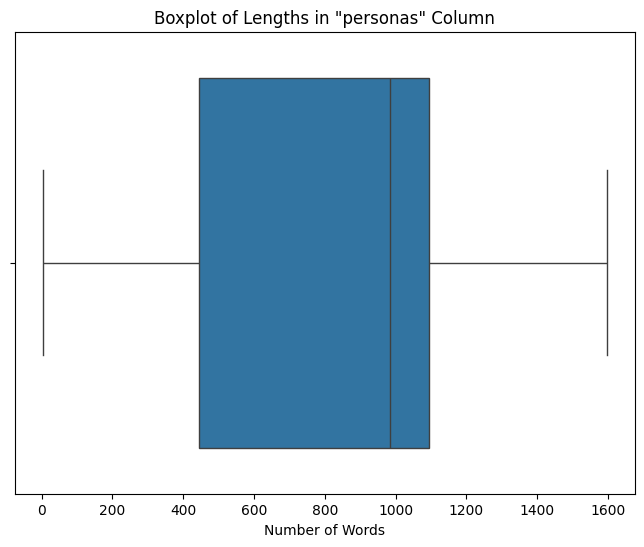

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the lengths of the 'personas' column
lengths = ds['personas'].apply(lambda x: len(str(x).split()))

# Plotting the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=lengths)
plt.title('Boxplot of Lengths in "personas" Column')
plt.xlabel('Number of Words')
plt.show()


In [18]:
# Convert lists to strings
ds["context_speakers"] = ds["context_speakers"].apply(lambda x: str(x) if isinstance(x, list) else x)

# Now use nunique()
unique_count = ds["context_speakers"].nunique()

print(unique_count)

11174


In [19]:
import pandas as pd

# Step 1: Group by 'context_speakers'
grouped = ds.groupby('context_speakers')

# Step 2: Randomly select one row from each group
sampled_df = grouped.apply(lambda x: x.sample(n=1, random_state=42), include_groups=True).reset_index(drop=True)

# Step 3: If the number of unique context_speakers is more than 1,000, sample 1,000 rows
sampled_df = sampled_df.sample(n=1000, random_state=42).reset_index(drop=True)

sampled_df


,personas,context,context_speakers,response,response_speaker
0,"[i 'm pretty sure this is real life, i remembe...","[peed my bed in my sleep , blamed the dog . go...",['hitmongui'],this is happened to me one time but it was act...,randylaheyjr
1,"[i hate it ., i do n't think so , no ., i know...",[i prefer my imaginary mum over my real mum . ...,['CCubone'],keep your chin up . you 'll be ok .,t4ctic4lc4ctus
2,"[i thought a caterpillar maybe ?, i ’ve always...",[hey you ’re losing me . i know you do n’t owe...,['lookynotouchy'],do you !,reversecircadian
3,"[i hope you ’re right on all of these ., i thi...",[i always tip my servers no less than 40 % bec...,['MileHighScrub'],i think you meant to post this i r / humblebrag .,drunkboater
4,"[i know , right ?, i 've been on reddit for to...",[when i was trying to insult you ... ... it to...,['givingmyselfadvice'],they say the most sincere flattery is imitatio...,remindmenottocomment
...,...,...,...,...,...
995,"[i like people asking me questions ., i really...",[i 'm afraid . i 'm afraid that ill never be a...,['throwaway32084234'],i feel the exact same way . you just need to k...,Noobulaiter
996,"[i see blue � �, i thought it 's only 2 years ...","[after 5 long years , today i got my masters d...","['FerromagneticBadger', 'dangstu', 'Ferromagne...",got it . enjoy the milestone ! !,dangstu
997,"[i 'm not looking to buy one ., i 'll be the f...",[where are you in the maturity climb ?],['ikaika92'],"can someone explain the "" blames self for worl...",creeksoup
998,"[i 'm here to stay !, i do , i 'll go up and r...","[possibly from the wine, and/or the hot tub .,...","['tehreal', 'TSL09', 'Logdeah', 'Regono', 'Man...",oxygen deficiency makes everybody giddy .,EzeSharp


- Responder Persona annotation ([User 2])
- Context annotation ([User 1])

In [20]:
sampled_df.drop(['context_speakers', 'response_speaker'], axis=1, inplace=True)
sampled_df.rename(columns={'response':'act_response'}, inplace= True)

In [21]:
sampled_df

,personas,context,act_response
0,"[i 'm pretty sure this is real life, i remembe...","[peed my bed in my sleep , blamed the dog . go...",this is happened to me one time but it was act...
1,"[i hate it ., i do n't think so , no ., i know...",[i prefer my imaginary mum over my real mum . ...,keep your chin up . you 'll be ok .
2,"[i thought a caterpillar maybe ?, i ’ve always...",[hey you ’re losing me . i know you do n’t owe...,do you !
3,"[i hope you ’re right on all of these ., i thi...",[i always tip my servers no less than 40 % bec...,i think you meant to post this i r / humblebrag .
4,"[i know , right ?, i 've been on reddit for to...",[when i was trying to insult you ... ... it to...,they say the most sincere flattery is imitatio...
...,...,...,...
995,"[i like people asking me questions ., i really...",[i 'm afraid . i 'm afraid that ill never be a...,i feel the exact same way . you just need to k...
996,"[i see blue � �, i thought it 's only 2 years ...","[after 5 long years , today i got my masters d...",got it . enjoy the milestone ! !
997,"[i 'm not looking to buy one ., i 'll be the f...",[where are you in the maturity climb ?],"can someone explain the "" blames self for worl..."
998,"[i 'm here to stay !, i do , i 'll go up and r...","[possibly from the wine, and/or the hot tub .,...",oxygen deficiency makes everybody giddy .


In [22]:
sampled_df.dtypes

personas        object
context         object
act_response    object
dtype: object

The below code proves that the 'personas' and 'context' column are in list format. But creating a 'query' column out of the last element of the 'context' column list is not working properly.

In [23]:
ds2 = sampled_df

In [24]:
import pandas as pd
import re
import unicodedata
import ast

def clean_text(text):
    # Remove non-ASCII characters
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('ascii')
    # Remove control characters
    text = re.sub(r'[\x00-\x1F\x7F]', '', text)
    # Remove double quotations and brackets
    text = text.replace('"', '').replace("'", "").replace("[", "").replace("]", "")
    return text

def convert_and_clean_text(text):
    try:
        # Convert string representation of list to list
        text_list = ast.literal_eval(text)
        if isinstance(text_list, list):
            # Join list elements into a single string
            text = " ".join(text_list)
        else:
            text = str(text_list)
    except (ValueError, SyntaxError):
        text = str(text)
    # Clean the resulting string
    return clean_text(text)



sampled_df['personas'] = sampled_df['personas'].apply(lambda x: convert_and_clean_text(x))
sampled_df['context'] = sampled_df['context'].apply(lambda x: convert_and_clean_text(x))

sampled_df['personas'] = sampled_df['personas'].apply(lambda x: "[Responder persona]: "+ str(x))

sampled_df.head()

,personas,context,act_response
0,[Responder persona]: i m pretty sure this is r...,"peed my bed in my sleep , blamed the dog . got...",this is happened to me one time but it was act...
1,"[Responder persona]: i hate it ., i do nt thin...",i prefer my imaginary mum over my real mum . i...,keep your chin up . you 'll be ok .
2,[Responder persona]: i thought a caterpillar m...,hey you re losing me . i know you do nt owe me...,do you !
3,[Responder persona]: i hope you re right on al...,i always tip my servers no less than 40 % beca...,i think you meant to post this i r / humblebrag .
4,"[Responder persona]: i know , right ?, i ve be...",when i was trying to insult you ... ... it too...,they say the most sincere flattery is imitatio...


In [25]:
# Calculate maximum number of words in each column
max_persona_length = sampled_df['personas'].apply(lambda x: len(x.split())).max()
max_context_length = sampled_df['context'].apply(lambda x: len(x.split())).max()
max_response_length = sampled_df['act_response'].apply(lambda x: len(x.split())).max()

print(f"Maximum Persona Length (in words): {max_persona_length}")
print(f"Maximum Context Length (in words): {max_context_length}")
print(f"Maximum Response Length (in words): {max_response_length}")

Maximum Persona Length (in words): 1383
Maximum Context Length (in words): 149
Maximum Response Length (in words): 44


In [26]:
# Calculate the average length of the 'personas' column
average_persona_length = sampled_df['personas'].apply(lambda x: len(x.split())).mean()
print(f"Average length of 'personas': {average_persona_length}")

Average length of 'personas': 831.291


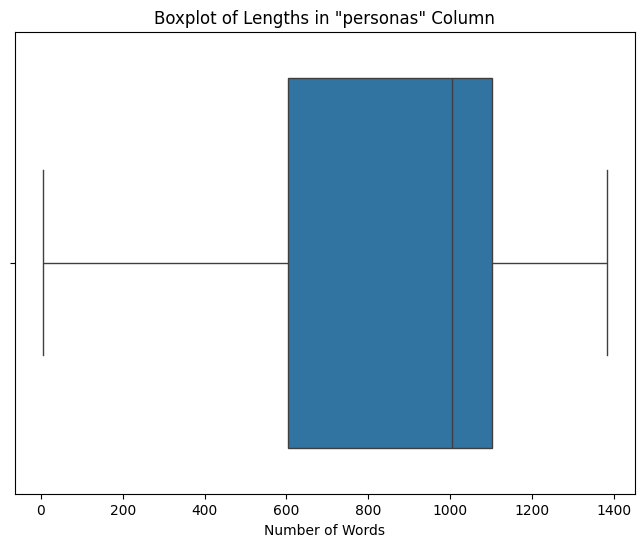

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the lengths of the 'personas' column
lengths = sampled_df['personas'].apply(lambda x: len(str(x).split()))

# Plotting the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=lengths)
plt.title('Boxplot of Lengths in "personas" Column')
plt.xlabel('Number of Words')
plt.show()


In [29]:
print(sampled_df.isnull().sum())

# Save the new DataFrame to a CSV file
sampled_df.to_csv('./datasets/' + Dataset + '/'+ 'ds_cleaned.csv', index=False)

personas        0
context         0
act_response    0
dtype: int64


## 5.ConvAI2

Papers with Code: https://paperswithcode.com/dataset/convai2

HuggingFace: https://huggingface.co/datasets/convai-challenge/conv_ai_2

- dialog : Array of dialogs.
- bot_profile : Bot annotated response that will be used for evaluation.
- user_profile : user annoted response that will be used for evaluation.
- eval_score : (1, 2, 3, 4, 5) how does an user like a conversation. The missing values are replaced with -1
- profile_match : (0, 1) an user is given by two profile descriptions (4 sentences each), one of them is the one given to the bot it had been talking to, the other one is random; the user needs to choose one of them.The missing values are replaced with -1


```python
{

    .... 
"bot_profile": [
            "my current goal is to run a k.",
            "when i grow up i want to be a physical therapist.",
            "i'm currently in high school.",
            "i make straight as in school.",
            "i won homecoming queen this year."
        ],
        "user_profile": [
            "my favorite color is red.",
            "i enjoy listening to classical music.",
            "i'm a christian.",
            "i can drive a tractor."
        ],
        "profile_match": 1
    }
```

seems that if profile_match is 1 -> it is a random profile.

In [1]:
Dataset = "ConvAI2"

In [2]:
from datasets import load_dataset

dataset = load_dataset("convai-challenge/conv_ai_2", trust_remote_code=True)
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'dialog_id', 'dialog', 'bot_profile', 'user_profile', 'eval_score', 'profile_match'],
        num_rows: 3495
    })
})

In [3]:
import pandas as pd

train_ds = pd.DataFrame(dataset['train'])
train_ds.to_csv(f'./datasets/{Dataset}/train.csv', index=False)

ds = train_ds.copy()
ds.isnull().sum()

id               0
dialog_id        0
dialog           0
bot_profile      0
user_profile     0
eval_score       0
profile_match    0
dtype: int64

In [4]:
ds

,id,dialog_id,dialog,bot_profile,user_profile,eval_score,profile_match
0,0xab38710,0xab38710,"[{'id': 0, 'sender': 'participant2', 'text': '...","[[i, , h, a, v, e, , a, m, a, z, i, n, g, ,...","[[t, w, o, , d, o, g, s, , l, i, v, e, , w,...",1,0
1,0x223f6d5e,0x223f6d5e,"[{'id': 0, 'sender': 'participant1', 'text': '...","[[m, y, , f, a, t, h, e, r, , w, a, s, , a,...","[[i, f, , i, ', m, , n, o, t, , c, o, o, k,...",1,1
2,0x6789b32a,0x6789b32a,"[{'id': 0, 'sender': 'participant1', 'text': '...","[[i, , a, m, , a, , g, o, l, d, , m, e, d,...","[[i, ', v, e, , a, , g, e, r, m, a, n, , s,...",1,1
3,0x7304a92a,0x7304a92a,"[{'id': 0, 'sender': 'participant2', 'text': '...","[[i, , f, a, n, t, a, s, i, z, e, , a, b, o,...","[[i, , l, i, k, e, , w, a, t, c, h, i, n, g,...",1,1
4,0x7470f02a,0x7470f02a,"[{'id': 0, 'sender': 'participant1', 'text': '...","[[i, , a, m, , 4, 0, , y, e, a, r, s, , o,...","[[i, , w, o, r, k, , f, o, r, , o, u, r, ,...",1,1
...,...,...,...,...,...,...,...
3490,0xd58490a,0xd58490a,"[{'id': 0, 'sender': 'participant1', 'text': '...","[[i, , l, i, k, e, , t, o, , g, o, , t, o,...","[[i, , a, l, s, o, , w, o, r, k, , a, s, ,...",1,1
3491,0x5c877561,0x5c877561,"[{'id': 0, 'sender': 'participant1', 'text': '...","[[m, y, , f, a, v, o, r, i, t, e, , m, o, v,...","[[i, , e, n, j, o, y, , r, e, a, d, i, n, g,...",1,0
3492,0x3dcfa9b9,0x3dcfa9b9,"[{'id': 0, 'sender': 'participant1', 'text': '...","[[e, a, t, i, n, g, , i, s, , s, o, m, e, t,...","[[i, , w, o, n, , a, , g, o, l, d, , m, e,...",-1,-1
3493,0x44c1894b,0x44c1894b,"[{'id': 0, 'sender': 'participant2', 'text': '...","[[i, , l, i, k, e, , d, o, n, u, t, s, .], [...","[[i, , a, m, , a, , 5, 6, , y, e, a, r, ,...",1,1


In [5]:
ds.drop(['id', 'dialog_id', 'eval_score'], axis=1, inplace=True)
print(ds.dtypes)
ds.head(5)

dialog           object
bot_profile      object
user_profile     object
profile_match     int64
dtype: object


,dialog,bot_profile,user_profile,profile_match
0,"[{'id': 0, 'sender': 'participant2', 'text': '...","[[i, , h, a, v, e, , a, m, a, z, i, n, g, ,...","[[t, w, o, , d, o, g, s, , l, i, v, e, , w,...",0
1,"[{'id': 0, 'sender': 'participant1', 'text': '...","[[m, y, , f, a, t, h, e, r, , w, a, s, , a,...","[[i, f, , i, ', m, , n, o, t, , c, o, o, k,...",1
2,"[{'id': 0, 'sender': 'participant1', 'text': '...","[[i, , a, m, , a, , g, o, l, d, , m, e, d,...","[[i, ', v, e, , a, , g, e, r, m, a, n, , s,...",1
3,"[{'id': 0, 'sender': 'participant2', 'text': '...","[[i, , f, a, n, t, a, s, i, z, e, , a, b, o,...","[[i, , l, i, k, e, , w, a, t, c, h, i, n, g,...",1
4,"[{'id': 0, 'sender': 'participant1', 'text': '...","[[i, , a, m, , 4, 0, , y, e, a, r, s, , o,...","[[i, , w, o, r, k, , f, o, r, , o, u, r, ,...",1


In [6]:
print(ds.shape)
# Remove rows with dialogues having fewer than three items
ds = ds[ds['dialog'].apply(lambda x: len(x) >= 3)]
print(ds.shape)

(3495, 4)
(2471, 4)


In [7]:
import pandas as pd

# Function to clean the dialogue column and create response, query, and context columns
def clean_dialogue(dialogue):
    try:
        # Annotate each sentence with the sender_class
        annotated_dialogue = [f"{turn['sender_class']}: {turn['text']}" for turn in dialogue]
        
        # Create the response, query, and context
        if len(annotated_dialogue) >= 2:
            response = annotated_dialogue[-1]
            query = annotated_dialogue[-2]
            context = " ".join(annotated_dialogue[:-2])
        else:
            response = annotated_dialogue[-1] if annotated_dialogue else ""
            query = annotated_dialogue[-2] if len(annotated_dialogue) > 1 else ""
            context = ""
        
        return pd.Series([response, query, context])
    except Exception as e:
        print(f"Error: {e} with dialogue: {dialogue}")
        return pd.Series(["", "", ""])

# Apply the function to the 'dialogue' column
ds[['act_response', 'query', 'context']] = ds['dialog'].apply(clean_dialogue)

# Drop the original 'dialogue' column
ds.drop(columns=['dialog'], inplace=True)

# Display the cleaned dataframe with the new columns
ds.head()


/tmp/ipykernel_2787128/3458823534.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds[['act_response', 'query', 'context']] = ds['dialog'].apply(clean_dialogue)
/tmp/ipykernel_2787128/3458823534.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds[['act_response', 'query', 'context']] = ds['dialog'].apply(clean_dialogue)
/tmp/ipykernel_2787128/3458823534.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

,bot_profile,user_profile,profile_match,act_response,query,context
0,"[[i, , h, a, v, e, , a, m, a, z, i, n, g, ,...","[[t, w, o, , d, o, g, s, , l, i, v, e, , w,...",0,Bot: I guess i just do not know what to ps4 ex...,Human: Strange answer,Bot: I love iphone! i just bought new iphone! ...
16,"[[i, , d, o, , n, o, t, , h, a, v, e, , m,...","[[i, , l, i, v, e, , i, n, , c, o, l, o, r,...",0,Bot: Text is not given. Please try to type /en...,Human: /test,Bot: What’s up? Human: Thank you how are you B...
18,"[[m, y, , f, a, t, h, e, r, , w, a, s, , a,...","[[m, y, , f, a, v, o, r, i, t, e, , a, c, t,...",0,"Bot: WHAT ARE YOU, A native OR SOMETH ing?",Human: Random answers.,Bot: Fine. Until I told him I sold his condo. ...
19,"[[i, , s, t, a, r, t, e, d, , a, , n, e, w,...","[[i, , l, i, v, e, , i, n, , a, l, a, b, a,...",0,"Bot: I live in alabama, where are you from?",Human: I live in alabama,"Bot: I like action movies, movies, movies, mov..."
20,"[[i, ', m, , s, i, n, g, l, e, , a, n, d, ,...","[[i, , w, o, r, k, , f, r, o, m, , h, o, m,...",1,Human: i don't go to the gym most days,Human: i watch too much tv from other peoples ...,Human: I work from home Human: what do you wan...


In [8]:
import ast

def clean_profile(profile):
    try:
        # Directly evaluate the list from the string if it's a string
        if isinstance(profile, str):
            profile_list = eval(profile)
        else:
            profile_list = profile
        # Flatten the nested list
        flat_list = [item for sublist in profile_list for item in sublist]
        # Join the list of characters to form a sentence
        return ''.join(flat_list)
    except Exception as e:
        print(f"Error: {e} with profile: {profile}")
        return profile

# Apply the function to both 'bot_profile' and 'user_profile' columns
ds['bot_profile'] = ds['bot_profile'].apply(clean_profile)
ds['user_profile'] = ds['user_profile'].apply(clean_profile)

# Display the cleaned dataframe
ds.head()

/tmp/ipykernel_2787128/3642582668.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['bot_profile'] = ds['bot_profile'].apply(clean_profile)
/tmp/ipykernel_2787128/3642582668.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['user_profile'] = ds['user_profile'].apply(clean_profile)


,bot_profile,user_profile,profile_match,act_response,query,context
0,i have amazing children and grandchildren.i ca...,two dogs live with me.i like doing the treadmi...,0,Bot: I guess i just do not know what to ps4 ex...,Human: Strange answer,Bot: I love iphone! i just bought new iphone! ...
16,i do not have many friends.i hate school.i am ...,i live in colorado.i am a mechanical engineer....,0,Bot: Text is not given. Please try to type /en...,Human: /test,Bot: What’s up? Human: Thank you how are you B...
18,my father was a door to door salesman.i'm in a...,my favorite activity is rock climbing.i live i...,0,"Bot: WHAT ARE YOU, A native OR SOMETH ing?",Human: Random answers.,Bot: Fine. Until I told him I sold his condo. ...
19,i started a new job as a pa three months ago.i...,i live in alabama.i like tacos.i've three sist...,0,"Bot: I live in alabama, where are you from?",Human: I live in alabama,"Bot: I like action movies, movies, movies, mov..."
20,i'm single and with two dogs.i don't drink alc...,i work from home.i like to spend my money on c...,1,Human: i don't go to the gym most days,Human: i watch too much tv from other peoples ...,Human: I work from home Human: what do you wan...


In [9]:
# Helper function to ensure the profile is a flat string
def flatten_profile(profile):
    if isinstance(profile, list):
        return ''.join([item for sublist in profile for item in sublist]) if isinstance(profile[0], list) else ''.join(profile)
    return profile

# Ensure the personas are in string format
ds['personas'] = ds.apply(lambda row: flatten_profile(row['bot_profile']) if row['profile_match'] == 0 else flatten_profile(row['user_profile']), axis=1)
ds['personas'] = "Human Persona: " + ds['personas']

# Drop the unnecessary columns
ds.drop(columns=['profile_match', 'bot_profile', 'user_profile'], inplace=True)

# Reorder the columns
ds = ds[['personas', 'context', 'query', 'act_response']]

# Display the final cleaned dataframe
ds.head()


/tmp/ipykernel_2787128/992458673.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['personas'] = ds.apply(lambda row: flatten_profile(row['bot_profile']) if row['profile_match'] == 0 else flatten_profile(row['user_profile']), axis=1)
/tmp/ipykernel_2787128/992458673.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['personas'] = "Human Persona: " + ds['personas']
/tmp/ipykernel_2787128/992458673.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

,personas,context,query,act_response
0,Human Persona: i have amazing children and gra...,Bot: I love iphone! i just bought new iphone! ...,Human: Strange answer,Bot: I guess i just do not know what to ps4 ex...
16,Human Persona: i do not have many friends.i ha...,Bot: What’s up? Human: Thank you how are you B...,Human: /test,Bot: Text is not given. Please try to type /en...
18,Human Persona: my father was a door to door sa...,Bot: Fine. Until I told him I sold his condo. ...,Human: Random answers.,"Bot: WHAT ARE YOU, A native OR SOMETH ing?"
19,Human Persona: i started a new job as a pa thr...,"Bot: I like action movies, movies, movies, mov...",Human: I live in alabama,"Bot: I live in alabama, where are you from?"
20,Human Persona: i work from home.i like to spen...,Human: I work from home Human: what do you wan...,Human: i watch too much tv from other peoples ...,Human: i don't go to the gym most days


In [10]:
# Calculate maximum number of words in each column
max_persona_length = ds['personas'].apply(lambda x: len(x.split())).max()
max_context_length = ds['context'].apply(lambda x: len(x.split())).max()
max_response_length = ds['act_response'].apply(lambda x: len(x.split())).max()

print(f"Maximum Persona Length (in words): {max_persona_length}")
print(f"Maximum Context Length (in words): {max_context_length}")
print(f"Maximum Response Length (in words): {max_response_length}")

Maximum Persona Length (in words): 54
Maximum Context Length (in words): 13704
Maximum Response Length (in words): 62


In [ ]:
print(ds.isnull().sum())

# Save the new DataFrame to a CSV file
ds.to_csv('./datasets/' + Dataset + '/'+ 'ds_cleaned.csv', index=False)

personas        0
context         0
query           0
act_response    0
dtype: int64


## 6.FoCus

## 7.IT-ConvAI2

Dataset Address:

https://github.com/CCIIPLab/Persona_Extend/tree/main/datasets/IT_ConvAI2


Inadequate-Tiny-ConvAI2 (IT-ConvAI2)

In [ ]:
Dataset = "IT-ConvAI2"

In [ ]:
import pandas as pd
import json

with open(f'./datasets/{Dataset}/data_valid_v2.json') as f:
    valid_data = json.load(f)

In [ ]:
def convertToDialogue(my_list):
    formatted_string = ""
    for index, item in enumerate(my_list):
        if index % 2 == 0:
            user = "User1"
        else:
            user = "User2"
        formatted_string += f"{user}: {item}\n"
    formatted_string = formatted_string.rstrip("\n")
    return formatted_string

#extract utterance and persona from dataset
flattened_data = []
data_list = valid_data['data']
for entry in data_list:
    persona =  ".".join(entry['full_personas'])
    flattened_data.append({
                'persona': persona,
                'utterance': convertToDialogue([entry['input'],entry['label']])
            })


df = pd.DataFrame(flattened_data) 

# clean data
df = df.replace(r'\*\*', '', regex=True)
df = df.replace(r'\r', '', regex=True)
df = df.replace("'", "", regex=True)


df.dropna(inplace=True)  #remove misvalue row

In [ ]:
# Function to split context, query, response from conversation
def split_conversation(conv_str):
    utterances = conv_str.split("\n")
    context = "\n".join(utterances[:-1])
    response = utterances[-1]
    return context,  response

#create DataFrame in base format
new_rows = []
for index, row in df.iterrows():
    context,  response = split_conversation(row['utterance'])
    new_row = {
        'personas': row['persona'],
        'context': context,
        'act_response': response
    }
    new_rows.append(new_row)

new_df = pd.DataFrame(new_rows)

# Remove duplicate rows based on 'personas', 'context', and 'act_response'
new_df = new_df.drop_duplicates(subset=['personas', 'context', 'act_response'])

print(new_df.isnull().sum())
new_df


personas        0
context         0
act_response    0
dtype: int64


,personas,context,act_response
0,i love disneyland and mickey mouse.i love to s...,"User1: no , we recently purchased a new house ...",User2: yes i love mickey mouse such a cute lit...
1,i love to drink fancy tea.i have a big library...,User1: hi how are you doing ? i am okay how ab...,User2: i am doing good . just sipping tea . wh...
2,im a little girl.ive superpowers.i like to mak...,User1: what is your name ? are you a male or f...,User2: im a girl . i do not give out my name .
3,i love cats and have two cats.my favorite seas...,User1: hi ! do you like turtles ?,User2: i am much more of a cat person actually
4,i love cats and have two cats.my favorite seas...,User1: what are your kitties names ?,"User2: snow and winter , named after my favori..."
...,...,...,...
1587,i produce music for artists.i drive a 2015 hon...,User1: sweet . do you work ? i work in a bank .,User2: i produce music . what do you do at the...
1589,im terrified of scorpions.im employed by the u...,"User1: theyre horrible , are they insects or a...","User2: i believe theyre insects , ny daddy use..."
1590,i am a musician and hope to make it big some d...,User1: what do you do for a living,"User2: im a janitor , but i also play music at..."
1592,i am a vegan and i love hummus.i love rollerco...,User1: do you like sports ? i love tennis and ...,User2: sports are ok but i love cooking shows ...


In [ ]:
new_df.iloc[20]['context']

'User1: what would be your dream job ?'

In [ ]:
# Calculate minimum and maximum number of words in each column
min_persona_length = new_df['personas'].apply(lambda x: len(x.split())).min()
max_persona_length = new_df['personas'].apply(lambda x: len(x.split())).max()

min_context_length = new_df['context'].apply(lambda x: len(x.split())).min()
max_context_length = new_df['context'].apply(lambda x: len(x.split())).max()

min_response_length = new_df['act_response'].apply(lambda x: len(x.split())).min()
max_response_length = new_df['act_response'].apply(lambda x: len(x.split())).max()

# Print the lengths in min-max format
print(f"Persona Length (in words): {min_persona_length}-{max_persona_length}")
print(f"Context Length (in words): {min_context_length}-{max_context_length}")
print(f"Response Length (in words): {min_response_length}-{max_response_length}")


Persona Length (in words): 10-52
Context Length (in words): 5-22
Response Length (in words): 4-22


In [ ]:
# Save the new DataFrame to a CSV file
new_df.to_csv(f'./datasets/{Dataset}/ds_cleaned.csv', index=False)

Code and Dataset Address:

https://github.com/pkchat-focus/FoCus?tab=readme-ov-file

In [12]:
Dataset = "FoCus"

In [16]:
import pandas as pd
import json

with open(f'./datasets/{Dataset}/valid_focus.json') as f:
    valid_data = json.load(f)

In [17]:
def convertToDialogue(my_list):
    formatted_string = ""
    for index, item in enumerate(my_list):
        if index % 2 == 0:
            user = "User1"
        else:
            user = "User2"
        formatted_string += f"{user}: {item}\n"
    formatted_string = formatted_string.rstrip("\n")
    return formatted_string

flattened_data = []
data_list = valid_data['data']
for entry in data_list:
    persona =  "".join(entry['persona'])
    list_length = len(entry["utterance"])
    last_utterance = entry["utterance"][-1]
    dialogue_key = f"dialogue{list_length}"
    last_item = last_utterance[dialogue_key]
    flattened_data.append({
                'dialogID': entry['dialogID'],
                'persona': persona,
                'utterance': convertToDialogue(last_item)
            })

df = pd.DataFrame(flattened_data)

In [18]:
df

,dialogID,persona,utterance
0,4YZMOWMPX9UC,I would like to visit the Nazareth House again...,User1: I think I've been there before but I do...
1,48AKKE9QF57H,I have been to Vermont a few times to go skiin...,"User1: Wow, this is amazing! What is this?\nUs..."
2,6EI7LBN8TC7M,I am fascinated by the Spanish Colonial Reviva...,"User1: Wow, this is amazing! What is this?\nUs..."
3,4W6XEA597Q2X,I want to become a college student.I want to s...,User1: Where is this place?\nUser2: Hello! Wel...
4,4NI21ORRIURQ,I like to visit england.I love church.I would ...,User1: Where is this place?\nUser2: This place...
...,...,...,...
995,500U0KPR7RN0,I am working in a pharmacy.I would like to vis...,User1: I think I've been there before but I do...
996,4XWQ09YS0D0L,I have the fantasy about archaeological sites....,"User1: Wow, this is amazing! What is this?\nUs..."
997,4TZCXA1JQC4C,I want to learn more about history.I love goin...,User1: Where is this place?\nUser2: Hello! Thi...
998,5VEB9WNET3GX,I love waterfalls.I like camping.I am fond of ...,User1: Where is this place?\nUser2: This is th...


In [19]:
df.iloc[0]["utterance"]

"User1: I think I've been there before but I don't remember the name of this place.\nUser2: This place is the Nazareth House, which you would like to visit again.\nUser1: Can you describe this house to me?\nUser2: You have curiosity about the description of Nazareth House and I will tell you. Nazareth House is prominently located on an elevation along Wynnum North Road. The complex consists of a number of buildings including the original building, the Convent and Chapel and two more recent additions, St Joseph's Hostel and the nursing home known as Larmeniere.\nUser1: Does this house look old to me, when it was built?\nUser2: This house is relatively old, but since you would like to know when it was built, I will explain it to you. Nazareth House was built from 1924 to 1939.\nUser1: What is the history of this house?\nUser2: The history of the house you are interested in began in 1925 when it was opened by Archbishop James Duhig as part of the charity established on the site by the Poo

In [20]:
df = df.replace(r'\*\*', '', regex=True)
df = df.replace(r'\r', '', regex=True)
df = df.replace("'", "", regex=True)

df.dropna(inplace=True)

# Function to split the conversation
def split_conversation(conv_str):
    utterances = conv_str.split("\n")
    context = "\n".join(utterances[:-1])
    response = utterances[-1]
    return context, response

new_rows = []
for index, row in df.iterrows():
    context, response = split_conversation(row['utterance'])
    new_row = {
        'personas': row['persona'],
        'context': context,
        'act_response': response
    }
    new_rows.append(new_row)

new_df = pd.DataFrame(new_rows)

new_df.head(2)

,personas,context,act_response
0,I would like to visit the Nazareth House again...,User1: I think Ive been there before but I don...,User2: The history of the house you are intere...
1,I have been to Vermont a few times to go skiin...,"User1: Wow, this is amazing! What is this?\nUs...",User2: This house was use as a stop for slaves...


In [21]:
# Calculate minimum and maximum number of words in each column
min_persona_length = new_df['personas'].apply(lambda x: len(x.split())).min()
max_persona_length = new_df['personas'].apply(lambda x: len(x.split())).max()

min_context_length = new_df['context'].apply(lambda x: len(x.split())).min()
max_context_length = new_df['context'].apply(lambda x: len(x.split())).max()

min_response_length = new_df['act_response'].apply(lambda x: len(x.split())).min()
max_response_length = new_df['act_response'].apply(lambda x: len(x.split())).max()

# Print the lengths in min-max format
print(f"Persona Length (in words): {min_persona_length}-{max_persona_length}")
print(f"Context Length (in words): {min_context_length}-{max_context_length}")
print(f"Response Length (in words): {min_response_length}-{max_response_length}")


Persona Length (in words): 11-61
Context Length (in words): 56-513
Response Length (in words): 4-108


In [22]:
# Save the new DataFrame to a CSV file
new_df.to_csv(f'./datasets/{Dataset}/ds_cleaned.csv', index=False)